In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import metrics

from matplotlib import colors
from mpl_toolkits import mplot3d
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
np.random.seed(42)

In [18]:
data = pd.read_csv('data/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
data.dropna(inplace=True)
print(data.shape[0])

2216


In [21]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dt_max = data['Dt_Customer'].max()
dt_min = data['Dt_Customer'].min()

print('Min date: ', dt_min)
print('Max data: ', dt_max)

Min date:  2012-01-08 00:00:00
Max data:  2014-12-06 00:00:00


In [22]:
data['Customer_for'] = dt_max - data['Dt_Customer']
data['Customer_for'] = pd.to_numeric(data['Customer_for'], errors='coerce')

In [23]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,27734400000000000


In [24]:
data['Age'] = 2014 - data['Year_Birth']
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Living_with'] = data['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Famaly_Size'] = data['Living_with'].replace({"Alone": 1, "Partner":2}) + data['Children']
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)
data['Education'] = data['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data = data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [25]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_with,Children,Famaly_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,57,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,60,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,49,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,30,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,33,422,Partner,1,3,1


<Figure size 576x396 with 0 Axes>

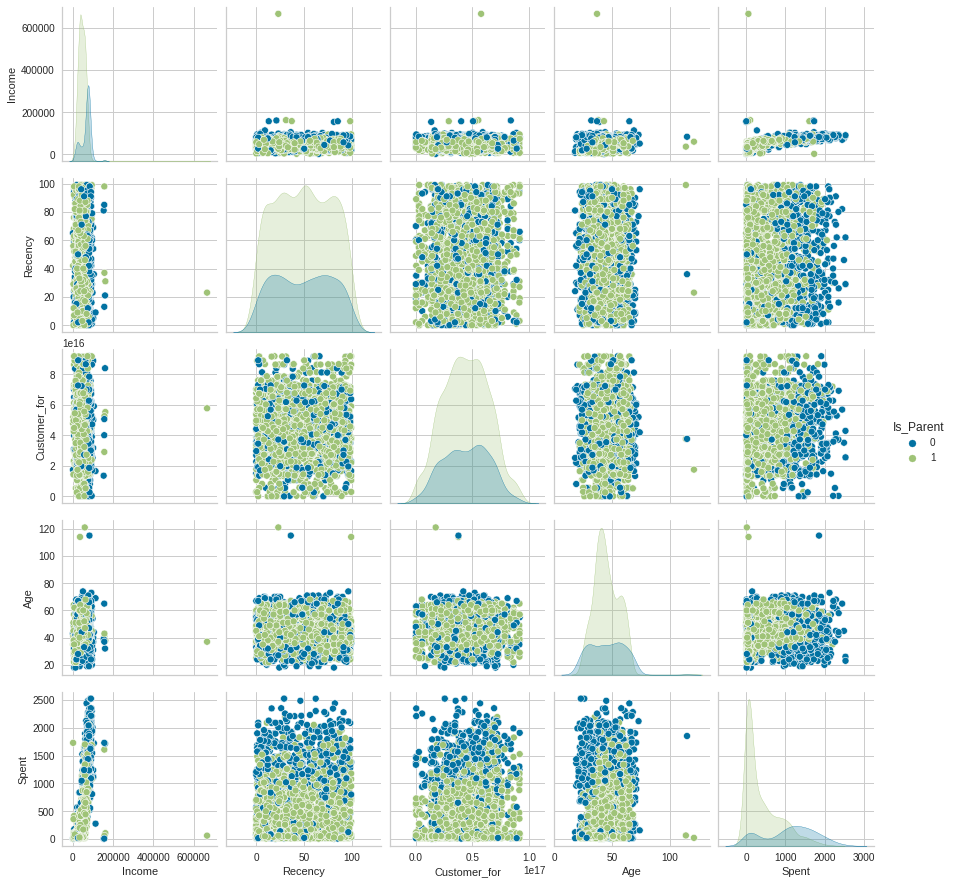

In [26]:
to_plot = ["Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[to_plot], hue='Is_Parent')
plt.show()

In [27]:
data = data[(data['Age'] < 90)]
data = data[(data['Income'] < 600000)]
print(data.shape[0])

2212


<AxesSubplot:>

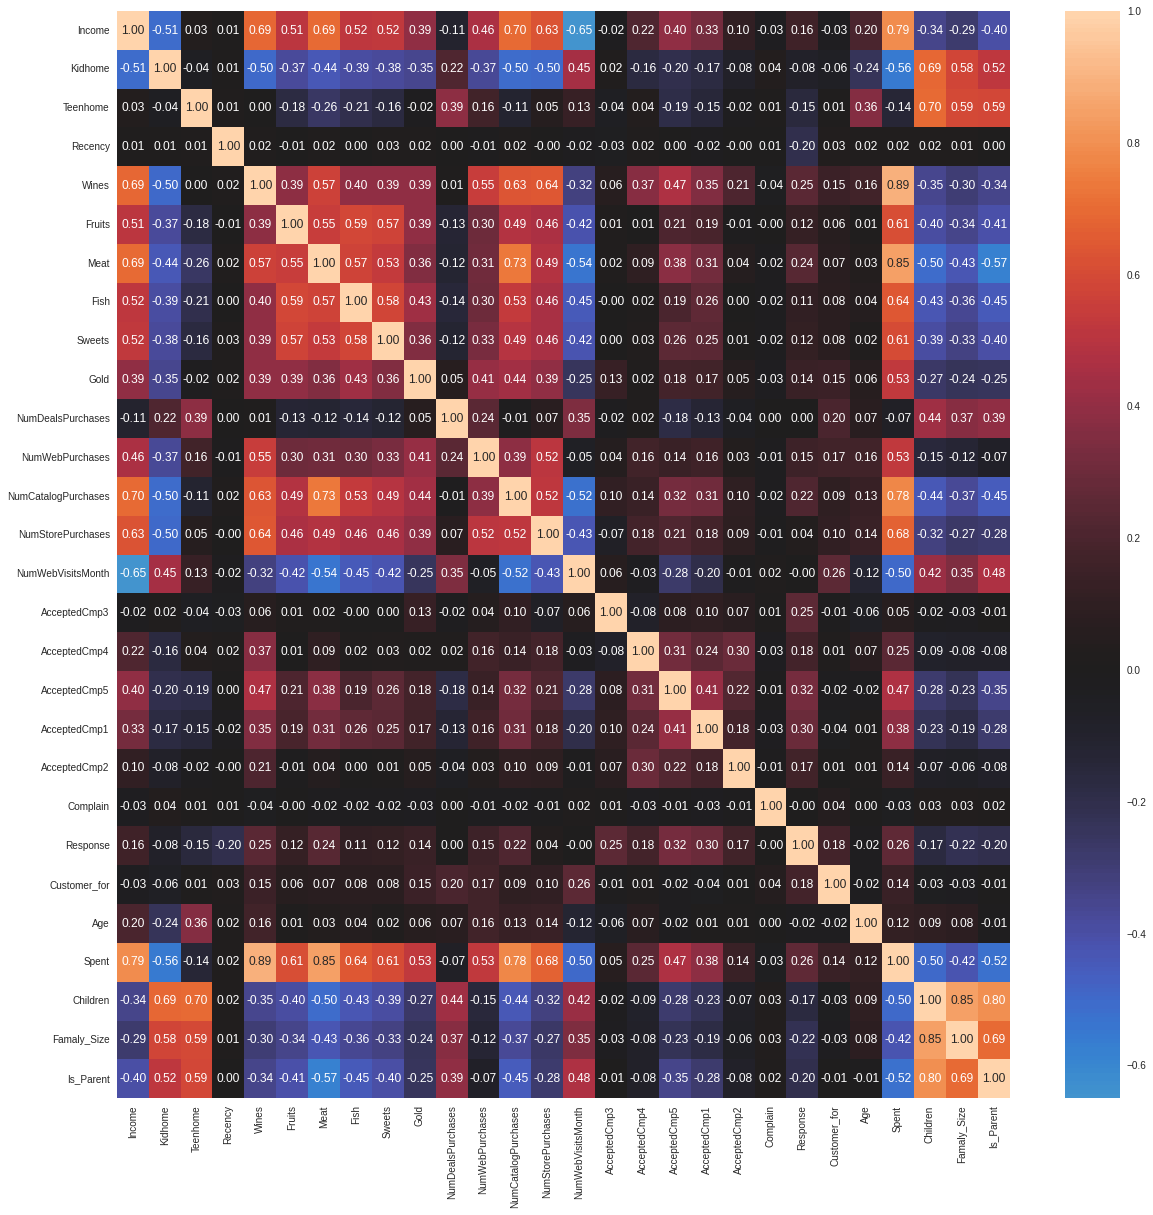

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f', center=0)

In [30]:
le = preprocessing.LabelEncoder()

data['Education'] = le.fit_transform(data['Education'])
data['Living_with'] = le.fit_transform(data['Living_with'])

ds = data.copy()

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

scaler = preprocessing.StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(data=scaler.transform(ds), columns=ds.columns)

scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Spent,Living_with,Children,Famaly_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [31]:
pca = decomposition.PCA(n_components=3)

pca_ds = pd.DataFrame(data=pca.fit_transform(scaled_ds), columns=['col1', 'col2', 'col3'])
pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-6.424437e-18,2.878377,-5.969376,-2.538496,-0.780419,2.383285,7.444312
col2,2212.0,-5.139550e-17,1.706839,-4.312231,-1.328292,-0.158089,1.242301,6.142717
col3,2212.0,5.942604e-17,1.221953,-3.530068,-0.829840,-0.025062,0.799715,6.600783


In [32]:
x, y, z = pca_ds['col1'], pca_ds['col2'], pca_ds['col3']

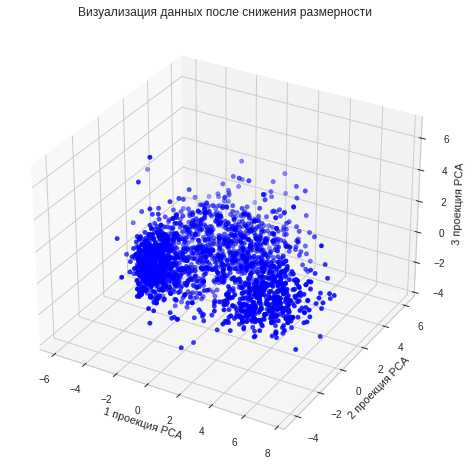

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')
ax.set_title('Визуализация данных после снижения размерности')
ax.set_xlabel('1 проекция PCA')
ax.set_ylabel('2 проекция PCA')
ax.set_zlabel('3 проекция PCA')
plt.show()

In [34]:
pal = ["y","g", "b","r"]
cmap = colors.ListedColormap(pal)

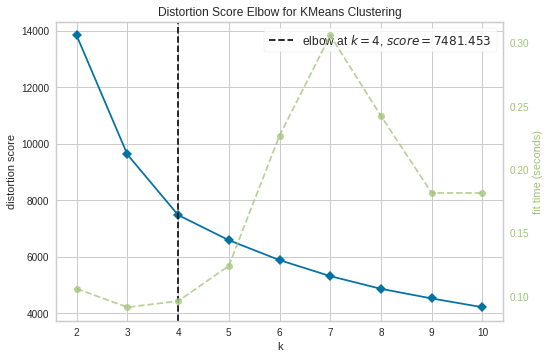

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
Elbow_M = KElbowVisualizer(cluster.KMeans(), k=10)
Elbow_M.fit(pca_ds)
Elbow_M.show()

In [36]:
model = cluster.KMeans(n_clusters=4)
y_pred = model.fit_predict(pca_ds)

pca_ds['Clusters'] = y_pred
data['Clusters'] = y_pred

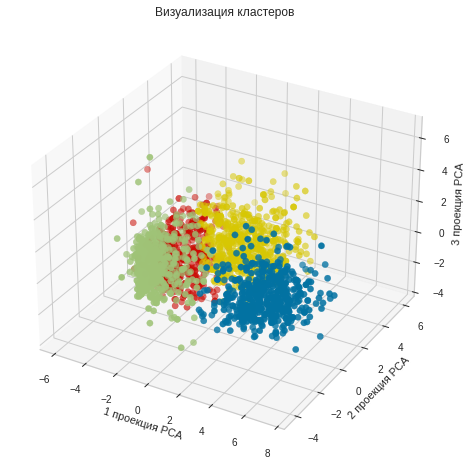

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=pca_ds['Clusters'], s=40, marker='o', cmap=cmap)
ax.set_title('Визуализация кластеров')
ax.set_xlabel('1 проекция PCA')
ax.set_ylabel('2 проекция PCA')
ax.set_zlabel('3 проекция PCA')
plt.show()

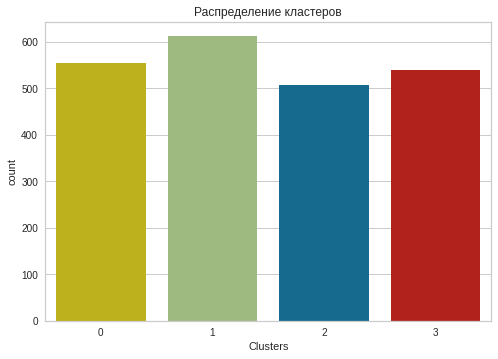

In [40]:
pl = sns.countplot(x=data['Clusters'], palette=pal)
pl.set_title('Распределение кластеров')
plt.show()

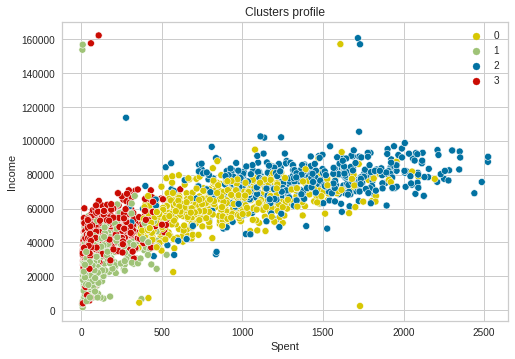

In [41]:
pl = sns.scatterplot(data=data, x=data['Spent'], y=data['Income'], hue=data['Clusters'], palette=pal)
pl.set_title('Clusters profile')
plt.legend()
plt.show()

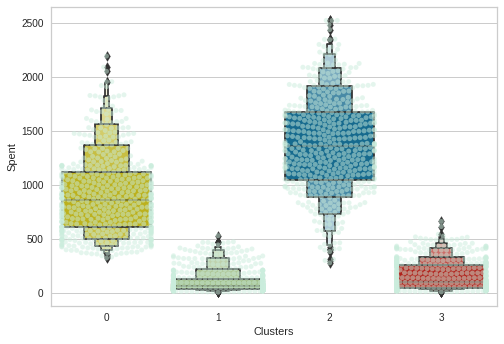

In [43]:
plt.figure()
pl = sns.swarmplot(x=data['Clusters'], y=data['Spent'], color='#CBEDDD', alpha=0.5)
pl = sns.boxenplot(x=data['Clusters'], y=data['Spent'], palette=pal)
plt.show()

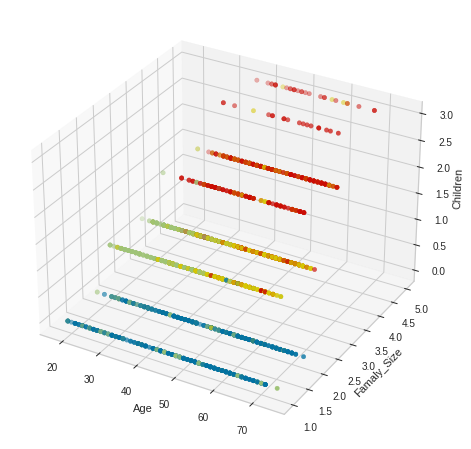

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Famaly_Size'], data['Children'], c=data['Clusters'], cmap=cmap, marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Famaly_Size')
ax.set_zlabel('Children')
plt.show()